In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

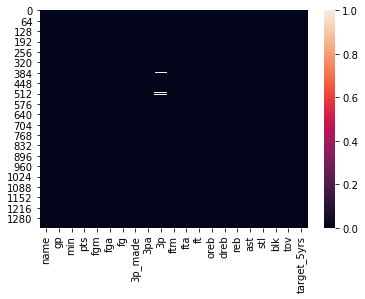

In [3]:
df = pd.read_csv('nba.csv')
sns.heatmap(df.isnull())

Index(['index', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made', '3pa', '3p',
       'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov',
       'target_5yrs'],
      dtype='object')

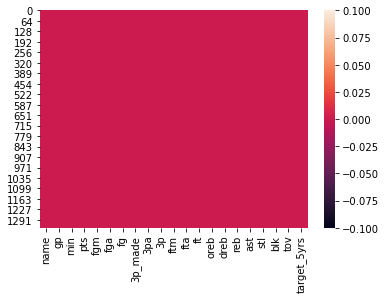

In [4]:
df = df.dropna()
sns.heatmap(df.isnull())
df = df.reset_index()
df = df.drop(['name'] ,axis = 1)
df.columns

In [47]:
# tov vs pts

X = df.drop(['target_5yrs'], axis = 1)
y = df.loc[:,'target_5yrs']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=161)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(930, 20)
(399, 20)
(930,)
(399,)


In [50]:
from sklearn.linear_model import LogisticRegression
lgm = LogisticRegression()

In [51]:
lgm.fit(X_train,y_train)

C:\Users\NetNapat2543\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
predictions = lgm.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,predictions))


[[ 74  65]
 [ 54 206]]


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.58      0.53      0.55       139
         1.0       0.76      0.79      0.78       260

    accuracy                           0.70       399
   macro avg       0.67      0.66      0.67       399
weighted avg       0.70      0.70      0.70       399



C:\Users\NetNapat2543\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target_5yrs', ylabel='Density'>

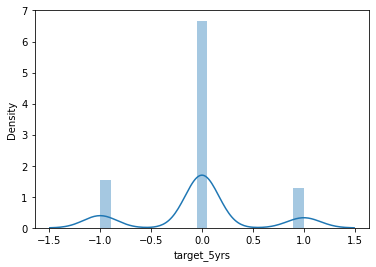

In [58]:

test_df = pd.DataFrame()
test_df["prediction"] = predictions
test_df["actual"] = y_test

# sns.scatterplot(data=test_df,x="actual",y="prediction")
sns.distplot((y_test-predictions))